In [8]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")
library(stringr)

In [9]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

# Convert taxonomy info to data frame with correct taxonomy labels

taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17,
18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [10]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))


In [11]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [12]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [13]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_both = subset_samples(ps_Clipped, filter_unpair=="no")
ps_both

select =c( "Ambient_Pathogen", "NH4_Pathogen"

         )
#only disease
ps_disease =subset_samples(ps_paired , Combo %in% select)
ps_disease



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 151 samples ]
sample_data() Sample Data:       [ 151 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 75 samples ]
sample_data() Sample Data:       [ 75 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [14]:
select_combo <- c("Ambient_Pathogen", "NH4_Pathogen", "Ambient_Placebo")

# Subset samples to only those Combo treatments
ps_disease <- subset_samples(ps_paired, Combo %in% select_combo)

# Further filter by Health based on Combo
ps_disease <- subset_samples(
  ps_disease,
  (Combo %in% c("Ambient_Pathogen", "NH4_Pathogen") & Health == "DL") |
  (Combo == "Ambient_Placebo" & Health == "AH")
)
ps_disease

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 76 samples ]
sample_data() Sample Data:       [ 76 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [15]:
ps_fill_disease = filter_taxa(ps_disease, function(x) sum(x > 5) > (0.10*length(x)), TRUE) %>% tax_fix()
ps_fill_disease
                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 149 taxa and 76 samples ]
sample_data() Sample Data:       [ 76 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 149 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 149 tips and 124 internal nodes ]

In [16]:
sample_data(ps_fill_disease) %>%
  group_by(Combo, Health, Pairs) %>%
  summarize(count = n()) %>%
  summarize(total = sum(count))

`summarise()` has grouped output by 'Combo', 'Health'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Health,total
<chr>,<chr>,<int>
Ambient_Pathogen,DL,21
Ambient_Placebo,AH,28
NH4_Pathogen,DL,27


In [17]:
set.seed(123)
output = ancombc2(data = ps_fill_disease, tax_level = "ASVs",
                  fix_formula = "Health", rand_formula = NULL,
                  p_adj_method = "holm", pseudo_sens = TRUE,
                  prv_cut = 0, lib_cut = 1000, s0_perc = 0.05,
                  group = "Health", struc_zero = TRUE, neg_lb = TRUE)

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Health

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, collection_date, Date, TimePoint, Replicate, Genotype, Nursery, Lat, Long, lat_long, organism, geo_loc_name, env_local_scale, env_broad_scale, env_medium, waterBody, countryCode, amplicon_sequenced, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, filter_unpair, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR

PASS

Checking other 

In [18]:
res=output$res
head(res)
dim(res)

taxa_df = tax_table(ps_fill_disease) %>% as.data.frame() %>% rownames_to_column("taxon")
head(taxa_df)

df_fig = res %>% left_join(taxa_df, by = "taxon")
dim(df_fig)
head(df_fig)

,taxon,lfc_(Intercept),lfc_HealthDL,se_(Intercept),se_HealthDL,W_(Intercept),W_HealthDL,p_(Intercept),p_HealthDL,q_(Intercept),q_HealthDL,diff_(Intercept),diff_HealthDL,passed_ss_(Intercept),passed_ss_HealthDL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,58a75ecc587c36de8b4bbbac0c6efff2,0.02872442,-0.01921146,0.11497612,0.1385063,0.2498294,-0.13870461,0.804316142,0.8905527974,1.00000000,1.000000000,FALSE,FALSE,FALSE,FALSE
2,317148b78ed8ecbf25c5448e8b5e0cf5,0.11857830,-0.02258564,0.12130571,0.1392811,0.9775162,-0.16215866,0.338484122,0.8725970978,1.00000000,1.000000000,FALSE,FALSE,TRUE,TRUE
3,75988391e4aca54b88d7669fabb11b96,0.08391628,0.01198707,0.09971065,0.1272544,0.8415980,0.09419771,0.414158119,0.9262869928,1.00000000,1.000000000,FALSE,FALSE,TRUE,TRUE
4,9d03eaed9d8a8b8d762b5af8640d1b32,0.05207216,0.04916188,0.11817120,0.1356673,0.4406502,0.36237090,0.665018377,0.7215405055,1.00000000,1.000000000,FALSE,FALSE,TRUE,TRUE
5,c2e0cafeeb1e69533d2bebd4f3ff5a87,-0.48537536,0.61787042,0.13092719,0.1448708,-3.7072158,4.26497600,0.001160507,0.0002908999,0.02204962,0.006399797,TRUE,TRUE,FALSE,FALSE
6,2256abda648749b2efbbc5ef6cf625d8,-0.14420643,0.23992108,0.12897585,0.1460879,-1.1180886,1.64230667,0.275071976,0.1141302205,1.00000000,1.000000000,FALSE,FALSE,TRUE,TRUE


[1] 31 15

,taxon,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,bec05b61187326748a5ba33a0267c26f,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_7554
2,2549b8aa248e7607235d17caa2578426,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_1483
3,a14b7162edeb7a30ddb2a46656539857,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_6427
4,7dfdf546ed4b1ca29ad5fbc0fc732338,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_5032
5,544e3f697c0460869c81cc5c7e774c6a,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_3397
6,94580582244d0d8eedb558e2a90c33fa,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_5921


[1] 31 23

,taxon,lfc_(Intercept),lfc_HealthDL,se_(Intercept),se_HealthDL,W_(Intercept),W_HealthDL,p_(Intercept),p_HealthDL,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_HealthDL,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,58a75ecc587c36de8b4bbbac0c6efff2,0.02872442,-0.01921146,0.11497612,0.1385063,0.2498294,-0.13870461,0.804316142,0.8905527974,1.00000000,⋯,FALSE,FALSE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Shimia,g__Shimia Genus,ASV_3570
2,317148b78ed8ecbf25c5448e8b5e0cf5,0.11857830,-0.02258564,0.12130571,0.1392811,0.9775162,-0.16215866,0.338484122,0.8725970978,1.00000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_1970
3,75988391e4aca54b88d7669fabb11b96,0.08391628,0.01198707,0.09971065,0.1272544,0.8415980,0.09419771,0.414158119,0.9262869928,1.00000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_4714
4,9d03eaed9d8a8b8d762b5af8640d1b32,0.05207216,0.04916188,0.11817120,0.1356673,0.4406502,0.36237090,0.665018377,0.7215405055,1.00000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_6253
5,c2e0cafeeb1e69533d2bebd4f3ff5a87,-0.48537536,0.61787042,0.13092719,0.1448708,-3.7072158,4.26497600,0.001160507,0.0002908999,0.02204962,⋯,FALSE,FALSE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_7717
6,2256abda648749b2efbbc5ef6cf625d8,-0.14420643,0.23992108,0.12897585,0.1460879,-1.1180886,1.64230667,0.275071976,0.1141302205,1.00000000,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_1372


In [20]:
df_fig = res %>% left_join(taxa_df, by = "taxon") %>%
filter(lfc_HealthDL < -0.05 | lfc_HealthDL > 0.05)   %>%
filter(passed_ss_HealthDL == "TRUE")
dim(df_fig)
head(df_fig)

[1]  4 23

,taxon,lfc_(Intercept),lfc_HealthDL,se_(Intercept),se_HealthDL,W_(Intercept),W_HealthDL,p_(Intercept),p_HealthDL,q_(Intercept),⋯,passed_ss_(Intercept),passed_ss_HealthDL,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2256abda648749b2efbbc5ef6cf625d8,-0.14420643,0.2399211,0.1289758,0.1460879,-1.1180886,1.6423067,0.2750720,0.1141302,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,NA,NA,ASV_1372
2,b5a357aca74c0d00b3adcc24fa98c9dd,-0.06058141,-0.1952242,0.1427691,0.1510921,-0.4243314,-1.2920874,0.6861177,0.2438583,1,⋯,FALSE,TRUE,d__Bacteria,p__Spirochaetota,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Spirochaeta_2,NA,ASV_7184
3,3af784892462923aa0bdd45788f7e9b7,0.09911869,-0.1441878,0.1861913,0.1940780,0.5323486,-0.7429374,0.5993790,0.4647302,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Oceanospirillales,f__Endozoicomonadaceae,g__Endozoicomonas,s__Acropora_cervicornis,ASV_2386
4,2b1b907bfda4cb721fb46388855b67ba,0.17377297,-0.0713735,0.1341876,0.1450489,1.2949999,-0.4920650,0.2429157,0.6401570,1,⋯,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Francisellales,f__Francisellaceae,g__[Caedibacter]_taeniospiralis_group,s__Cysteiniphilum_litorale,ASV_1719


In [21]:
#write_csv(df_fig, "/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_Outcome.csv")

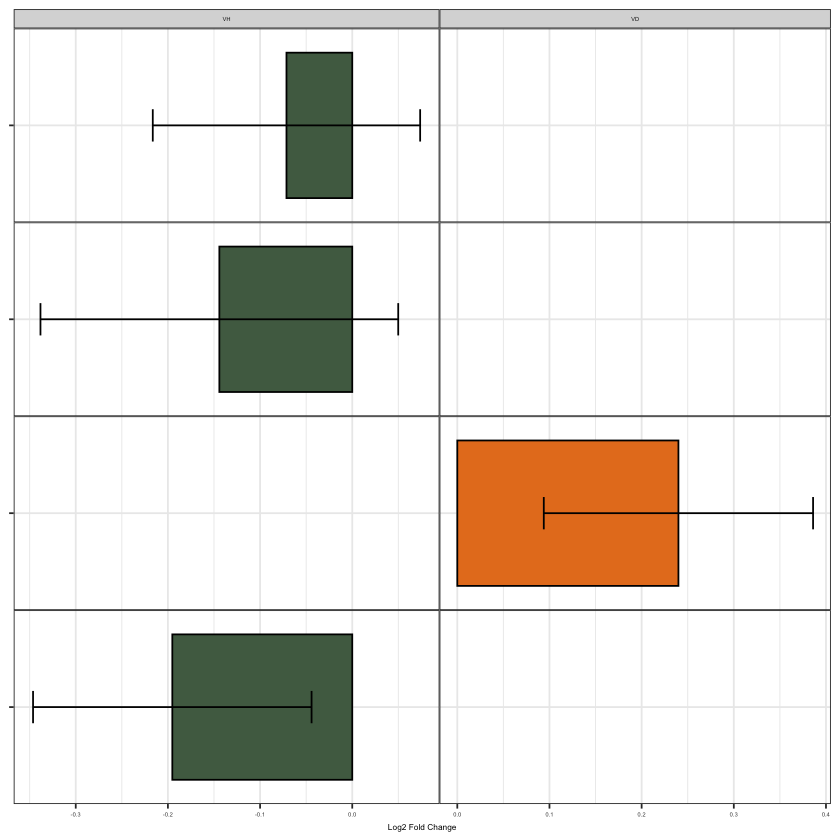

In [26]:
#plot

df_fig <- df_fig %>%
  filter(passed_ss_HealthDL == "TRUE") %>%
  mutate(
    direction = ifelse(lfc_HealthDL > 0, "DL", "AH"),
    direction = factor(direction, levels = c("AH", "DL"))
  ) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
  mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%
  mutate(direction = recode(direction, "AH" = "VH", "DL" = "VD"))

df_fig$direction <- factor(df_fig$direction, levels = c("VH", "VD"))

F1 <- 
  ggplot(df_fig, aes(x = reorder(ASVs, lfc_HealthDL), y = lfc_HealthDL, fill = direction)) +
  geom_bar(stat = "identity", color = "black") +
  geom_errorbar(aes(ymin = lfc_HealthDL - se_HealthDL, 
                    ymax = lfc_HealthDL + se_HealthDL), width = 0.2) +
  coord_flip() +
  labs(
    x = "ASVs",
    y = "Log2 Fold Change",
    fill = "Direction"
  ) +
  scale_fill_manual(values = c("VD" = "#e67e22", "VH" = "#516b51")) +
  facet_grid(Order ~ direction, space = "free", scales = "free", switch = "y") +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_blank(),
    axis.text.x = element_text(size = 3.5),
    axis.text.y = element_blank(),
    strip.text.x = element_text(size = 3.4),
    strip.text.y = element_blank(),
    legend.text = element_text(size = 5),
    legend.title = element_text(size = 5),
    legend.position = "none",
    panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  )

F1


In [27]:
psr_fill_melt = ps_fill_disease %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()   


taxa_fil= df_fig %>% column_to_rownames("taxon")%>%
as.matrix


ps_DLPL=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(taxa_fil))
ps_DLPL=subset_samples(ps_DLPL, !ID %in% dups & Genotype!="U41")
ps_DLPL



ps_ancom_APa = subset_samples(ps_DLPL,
                       Combo %in% select
                             )


psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()  


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 61 sample variables ]
tax_table()   Taxonomy Table:    [ 4 taxa by 23 taxonomic ranks ]


VD VH 
25 51 


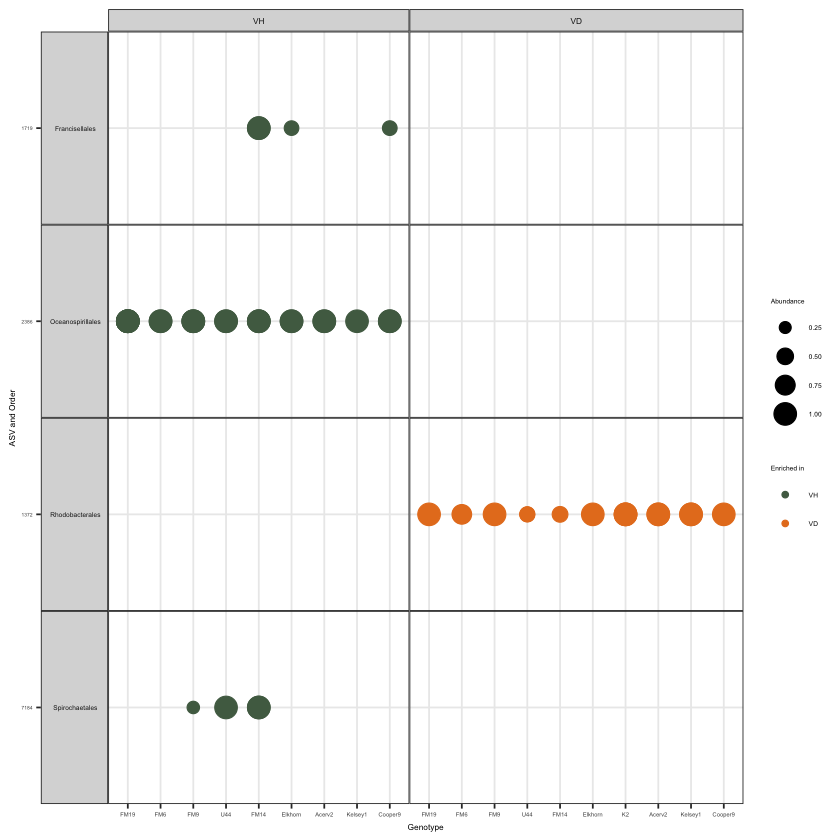

In [29]:

#plot

psr_fill_melt2 <- psr_fill_melt %>%
  as.data.frame() %>%
  mutate(
    Abundance = as.numeric(as.character(Abundance)),
    lfc_HealthDL = as.numeric(str_trim(as.character(lfc_HealthDL)))
  ) %>%
  filter(
    passed_ss_HealthDL == "TRUE",
    Abundance > 0,
    !is.na(Severity)
  ) %>%
  mutate(
    Enriched = ifelse(lfc_HealthDL > 0, "VD", "VH")
  ) %>%
  { print(table(.$Enriched)); . } %>%  # Debug check

  #  string replacements 
mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%
  mutate(direction = recode(direction, "AH" = "VH", "DL" = "VD"))

psr_fill_melt2$direction<-factor(psr_fill_melt2$direction, levels=c("VH", "VD"))


F2 <-   psr_fill_melt2%>%

ggplot(aes(x = Genotype, y = reorder(ASVs, lfc_HealthDL))) +
  geom_point(aes(size = Abundance, color = direction)) +
  scale_color_manual("Enriched in",values = c( "VH" = "#516b51", "VD" = "#e67e22")) +
  facet_grid(Order ~ direction, space = "free", scales = "free", switch = "y") +
  theme_bw() +
  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
    axis.text.x = element_text(size = 3.5),
    axis.text.y = element_text(size = 3),
    strip.text.y = element_text(size = 4),
    strip.text.y.left = element_text(angle = 0),
    strip.text.x = element_text(size=5),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4)
  ) +
  ylab("ASV and Order") +
 theme(panel.spacing.x=unit(0.0, "lines"),panel.spacing.y=unit(0.0, "lines"))
F2

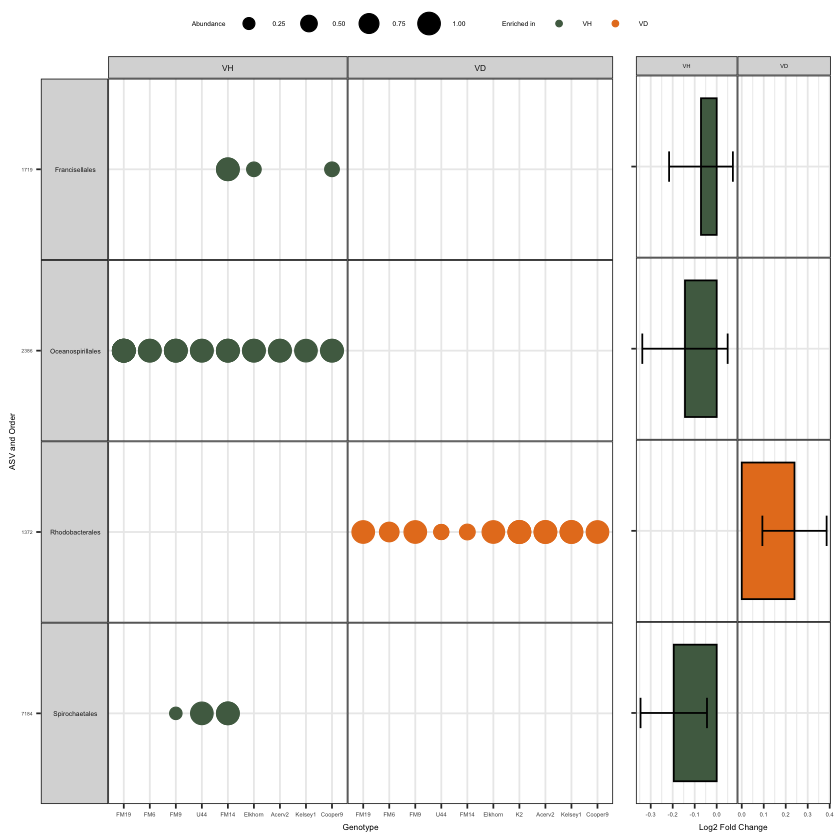

In [30]:
 ggpubr::ggarrange(F2, F1,common.legend = TRUE, legend = "top",
                   widths=c(2,0.7))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig7.png", 
      width = 6.8, height = 4, units = "in", dpi=300)

In [18]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.6.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] doRNG_1.8.6.2     rngtools_1.5.2    foreach_1.5.2     ggpubr_0.6.0     
 [5] microViz_0.12.7   lubridate_1.9.4   forcats_1.0.0     stringr_1.5.1    
 [9] dplyr_1.1.4       purrr_1.0.4       readr_2.1.5       tidyverse_2.0.0  
[13] microbiome_1.30.0 phyloseq_1.52.0   ggplot2_4.0.0     tibble_3.3.0     
[17] tidyr_1.3.1       qiime2R_0.99.6    ANCOMBC_2.10.0   

loaded via a namespace (and not attached):
  [1] R